google colab의 Python package 확인방법

```shell
!pip list
```

> Colab에서는 코드 Cell에서 ! 표시가 쉘 명령어를 실행하는 것을 의미한다.

## **3.5 텐서플로 시작하기**
신경망 훈련 진행단계</br>&nbsp;

1) 저수준 텐서 연산 &rarr; 2) 고수준 텐서 연산</br>

`1) : Tensorflow API`로 변환</br>
- **텐서**
  - `상수`, `변수` 모두 가능
  - **변수**: 신경망의 상태를 저장하는 특별한 텐서
- **텐서 연산**
  - 덧셈, relu, matmul
- **역전파**
  - 수학 표현식의 gradient를 계산하는 방법
  - `GradientTape` 객체를 통해 연산 처리

`2) : Keras API`로 변환</br>
- **층(layer)**
  - **모델(model)**을 구성함
- **손실 함수**
  - 학습에 사용하는 피드백 신호를 정의
- **옵티마이저**
  - 학습 진행 방법을 결정
- **측정 지표**
  - 모델의 성능을 평가, 정확도와 유사함
- **훈련 루프**
  - 미니 배치 확률적 경사 하강법을 수행

### **상수 텐서와 변수**
Tensorflow에서 어떤 작업을 하려면 텐서(tensor)가 필요하다.</br>
- 텐서를 만드려면 초기값이 필요하다.

아래는 예시 코드들

In [ ]:
## 3-1 1st) 모든 값이 1인 텐서
import tensorflow as tf

x = tf.ones(shape=(2,1))  ## np.ones(shape=(2,1)) 과 동일한 구조의 데이터

print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
## 3-1 2nd) 모든 값이 0인 텐서
x = tf.zeros(shape=(2,1))   ## np.zeros(shape=(2,1)) 과 동일한 구조의 데이터

print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [ ]:
## 3-2 랜덤한 분포값으로 이루어진 텐서
# 평균 0, 표준 편차 1 인 정규 분포에서 뽑은 랜덤한 값으로 만든 텐서 x
x = tf.random.normal(shape=(3,1), mean=0., stddev=1.)   ## np.random.normal(size=(3,1), loc=0, scale=1) 과 같은 구조의 데이터

print(x)

tf.Tensor(
[[ 0.17420927]
 [-0.2557913 ]
 [-0.68071175]], shape=(3, 1), dtype=float32)


In [ ]:
# 0과 1사이의 균등 분포(uniform distribution)에서 뽑은 랜덤 값으로 만든 텐서 x
x = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)    ## np.random.uniform(size=(3,1), low=0, high=1.) 과 같은 구조의 데이터

print(x)

tf.Tensor(
[[0.41923177]
 [0.52068686]
 [0.6382941 ]], shape=(3, 1), dtype=float32)


`Numpy`의 배열이나 `Tensorflow`의 텐서 모두 동일한 데이터 구조를 가질 수 있다.</br>

그렇다면 가장 큰 차이점은?</br>
- 텐서에는 값을 할당할 수 없고, numpy의 배열에는 값을 할당할 수 있다.
- tensorflow의 텐서는 `상수`다

---

모델을 훈련하기 위해서는 모델의 상태를 업데이트 해야한다.</br>
>Tensorflow에서 모델의 상태는 일련의 텐서이다.</br>
>Tensorflow에서는 텐서에 값을 부여하기 위해 `tf.Variable`을 사용하여 텐서의 값을 변수처럼 사용할 수 있다.

In [ ]:
# 변수를 만들려면 초기값 설정이 필요함
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.75268775],
       [ 0.63575196],
       [ 0.5060905 ]], dtype=float32)>


In [ ]:
## 변수 상태 수정은 assign 메서드를 활용
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
## assign은 일부 원소에만 적용 가능
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
## `+=` 기능과 동일한 작동을 하는 assign_add()
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [ ]:
## '-=' 기능과 동일한 작동을 하는 assign_sub()
v.assign_sub(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

### **텐서 연산: 텐서플로에서 수학 계산하기**
`Numpy`와 같이 `Tensorflow`는 수학 공식을 표현하기 위해 많은 텐서 연산을 제공함</br>

```python
# 임의의 텐서 'a' 생성
a = tf.ones((2,2))
# 'a'의 제곱 계산
b = tf.square(a)
# 'a'의 제곱근 계산
c = tf.sqrt(a)
# 두 텐서('b', 'c') 더하기; 원소별 연산
d = b + c
# 두 텐서('a', 'b') 의 점곱 (dot) 계산
e = tf.matmul(a,b)
# 두 텐서 ('d', 'e')를 곱하기; 원소별 연산
e *= d
```

### **GradientTape API 다시 살펴보기**
`Tensorflow`는 `Numpy`와 다르게 어떤 입력이 들어오더라도 **미분이 가능하다면**, **Gradient 계산이 가능**하다.

In [ ]:
# 변수가 입력될 때, gradient 구하기 예제
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [ ]:
# 상수가 입력될 때, gradient 구하기 예제
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

Gradient 계산 시 `상수`가 입력된다면, `tape.watch()`를 사용하여 해당 상수 값을 추적한다는 것을 수동으로 알려주어야 한다.
</br>&nbsp;</br>
**Why?**</br>
- 모든 텐서에 대한 모든 gradient를 계산하기 위해 필요한 정보를 미리 저장하기에는 `비용` 문제가 있기 때문

> 변수 입력 시에는 `tape.watch()`가 사용되지 않은 이유
>> 훈련 가능한 변수는 기본적으로 감시 대상으로 GradientTape API에 설정되어 있음


In [ ]:
# 이계도(second-order) Gradient 예제; second-order is gradient of the gradient
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration= outer_tape.gradient(speed, time)

print(f"계산된 가속도 acceleration: {acceleration}")

계산된 가속도 acceleration: 9.800000190734863


### **End-to-End 예제: 텐서플로 선형 분류기**

선형적으로 잘 구분되는 합성 데이터 만들어보기

1. 2D 평면의 포인트로 2개의 클래스를 가짐
  - 클래스의 포인트는 다음과 같은 구조로 구성함
    - 특정한 평균과 공분산 행렬(convariance matrix)을 가진 랜덤 분포에서 선택된 좌표 값
2. 각각의 포인트 클라우드는 동일한 공분산 행렬을 사용
3. 평균은 다른 값을 각각의 클라우드에 적용함
  - 두 포인트 클라우드는 같은 모양, 다른 위치에 생성됨

In [ ]:
import numpy as np

# 2D 평면에 두 클래스의 랜덤 포인트들 생성하기
num_samples_per_class = 1000
## 첫 번째 클래스 포인트 생성
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]], # 좌하단에서 시작하여 우하단으로 뻗어나가는 타원형의 포인트 클라우드 공분산 행렬
    size = num_samples_per_class
)
## 두 번째 클래스 포인트 생성
positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]], # 좌하단에서 시작하여 우하단으로 뻗어나가는 타원형의 포인트 클라우드 공분산 행렬
    size = num_samples_per_class
)

In [ ]:
## 각각의 클래스 포인트 배열([1000, 2])을 수직으로 연결하여 단일 배열([2000, 2]) 만들기
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [ ]:
## 각각 [2000, 1] 크기의 0-array, 1-array을 합쳐서 타깃 레이블 생성
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

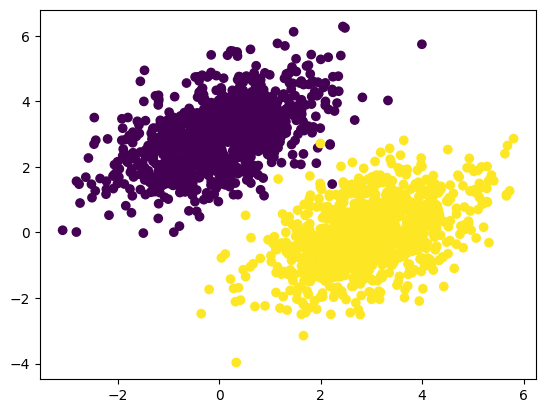

In [ ]:
## 생성한 데이터들을 그래프로 표현하기
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0])
plt.show()

이제 생성된 데이터를 기반으로 선형 분류를 할 수 있는 `선형 분류기`를 만들자</br>

- 선형 분류기: 하나의 Affine transposition($prediction = W\cdot input + b$)
  - 선형 분류기는 `예측(prediction)`과 `타깃(targets)` 사이의 차이를 제곱한 값을 최소화하도록 훈련

In [ ]:
# 두 개의 클라우드를 구분할 수 있는 선형 분류기 만들기
## 선형 분류기의 변수 만들기
input_dim = 2 # 입력은 2D point
output_dim = 1  # 출력 예측: 샘플당 하나의 정수; 0 ~ 1 사이의 값을 체크하여 0에 가까우면 0으로, 1에 가까우면 1로 예측

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [ ]:
# Forward pass 함수 선언
def model(inputs):
  return tf.matmul(inputs, W) + b

In [ ]:
# Loss function 선언
## 평균 제곱 오차 손실 함수
def square_loss(targets, predictions):
  # per_sample_losses는 targets나 predictions와 크기가 같은 텐서
  ## 각 샘플의 손실 값을 저장함
  per_sample_losses = tf.square(targets - predictions)

  # 샘플당 손실 값을 하나의 스칼라 손실 값으로 평균처리; reduce_mean()에서 연산
  return tf.reduce_mean(per_sample_losses)

In [ ]:
# 훈련 스텝 함수
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    # 정방향 패스의 진행상황을 gradient tape에 기록
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  # 가중치에 대한 손실 gradient 구하기
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  # 가중치 업데이트
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

`trainig_step()`에서 사용된 훈련은 배치 훈련이다. (`미니 배치` 훈련을 사용하지 않음)</br>

- 전체 데이터를 사용하여 훈련 스텝을 실행
- 각각의 gradient 업데이트에서 미니 배치를 사용하지 않으므로 훈련 데이터의 손실이 적음
- 결과적으로 훈련 스텝의 횟수가 미니 배치보다 적어질 수 있음
- 일반적으로 미니 배치 훈련 때보다 큰 학습률을 사용할 수 있다

In [ ]:
# 배치 훈련 루프
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"{step}번 째 step의 손실: {loss:.4f}")

0번 째 step의 손실: 2.3897
1번 째 step의 손실: 0.3567
2번 째 step의 손실: 0.1507
3번 째 step의 손실: 0.1215
4번 째 step의 손실: 0.1111
5번 째 step의 손실: 0.1033
6번 째 step의 손실: 0.0964
7번 째 step의 손실: 0.0901
8번 째 step의 손실: 0.0844
9번 째 step의 손실: 0.0792
10번 째 step의 손실: 0.0744
11번 째 step의 손실: 0.0700
12번 째 step의 손실: 0.0661
13번 째 step의 손실: 0.0625
14번 째 step의 손실: 0.0592
15번 째 step의 손실: 0.0562
16번 째 step의 손실: 0.0535
17번 째 step의 손실: 0.0510
18번 째 step의 손실: 0.0487
19번 째 step의 손실: 0.0466
20번 째 step의 손실: 0.0447
21번 째 step의 손실: 0.0430
22번 째 step의 손실: 0.0415
23번 째 step의 손실: 0.0400
24번 째 step의 손실: 0.0387
25번 째 step의 손실: 0.0375
26번 째 step의 손실: 0.0365
27번 째 step의 손실: 0.0355
28번 째 step의 손실: 0.0346
29번 째 step의 손실: 0.0337
30번 째 step의 손실: 0.0330
31번 째 step의 손실: 0.0323
32번 째 step의 손실: 0.0317
33번 째 step의 손실: 0.0311
34번 째 step의 손실: 0.0306
35번 째 step의 손실: 0.0301
36번 째 step의 손실: 0.0297
37번 째 step의 손실: 0.0293
38번 째 step의 손실: 0.0290
39번 째 step의 손실: 0.0286


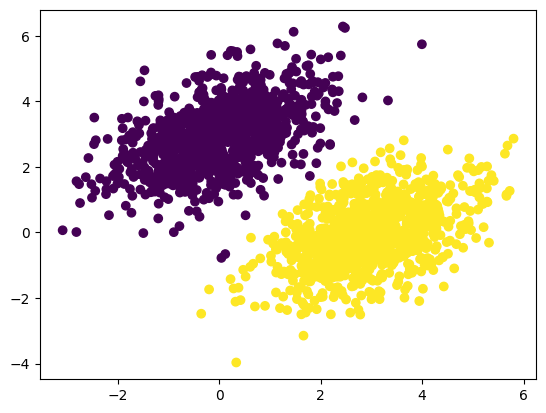

In [ ]:
## 훈련 모델의 point cloud 가시화 그래프
predictions = model(inputs)
# threshold를 0.5로 설정
# 입력 포인트의 예측 값이 0.5 보다 클 경우 '1', 0.5 보다 작을 경우 '0'으로 분류
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

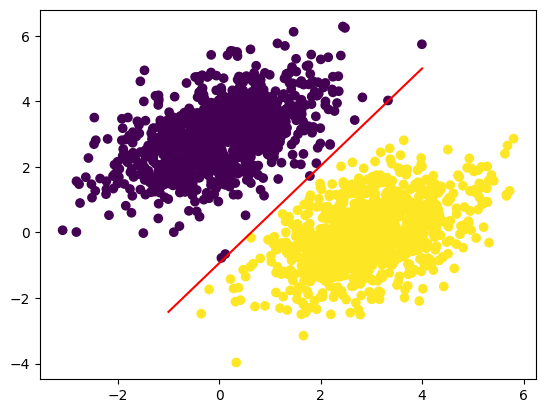

In [ ]:
# 예측값(prediction)을 분류하는 직선 방정식 그리기
# 직선 방정식 = - w1 / w2 * x + (0.5 - b) / w2

## 직선을 그리기 위해 -1 ~ 4 사이에 일정 간격으로 100개의 숫자 생성
x = np.linspace(-1, 4, 100)
# 사용할 직선 방정식
y = - W[0] / W[1] * x + (0.5 - b) / W[1]

# 직선을 붉은색으로 설정
plt.plot(x, y, "-r")
# 모델 예측을 그래프에서 나타내기 위한 threshold 설정
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

## **3.6 신경망의 구조: 핵심 Keras API 이해하기**

케라스 API는 다음의 과정을 통해 모델을 구현한다</br>

---

층(`딥러닝의 구성 요소`) &rarr; 모델(`층`을 기반으로 구성) &rarr; 학습 과정 설정(`컴파일`) &rarr; 손실 함수 선택 &rarr; 훈련(`fit()`메서드로 구현)

---

### **층 (딥러닝의 구성 요소)**
> 하나 이상의 텐서를 입력으로 받고 하나 이상의 텐서를 출력하는 데이터 처리 모듈

층마다 적절한 텐서 포맷과 데이터 처리 방식이 다름</br>
1. **`Rank-2`** Case
  > 간단한 벡터 데이터는 다음의 방법으로 처리하는 경우가 일반적임

  - **밀집 연결 층**(densely connected layer)
    - 케라스에서는 `Dense` 클래스에 해당
  - **완전 연결 층**(fully connected layer)
  - **밀집 층**(dense layer)

  위 표현들은 전부 같은 방법을 다른 이름들로 표현하였다

2. **`Rank-3`** Case
  > 주로 시퀀스 데이터가 저장됨

  - **순환 층**(recurrent layer)
    - `LSTM` 방식을 주로 사용
  - 1D**합성 곱 층**(convolution layer)
    - `Conv1D` 방식을 주로 사용

3. **`Rank-4`** Case
  > 주로 이미지 데이터가 저장됨

  - 2D**합성 곱 층**(convolution layer)
    - `Conv2D`방식을 주로 사용

&nbsp;
  > *케라스에서 딥러닝 모델을 만드는 것의 의미*
  >> 호환되는 층을 서로 연결하여 유용한 데이터 변환 파이프라인을 구성하는 것
  >>> 이러한 이유로 케라스에서는 `층`을 딥러닝의 레고 블록처럼 생각하는 경우가 있다.

#### **케라스의 Layer 클래스**

> `Layer` 클래스는 상태(가중치)와 연산(정방향 패스)을 캡슐화한 객체

&nbsp;</br>
가중치는 일반적으로 `build()` 메서드에서 정의하고 연산은 `call()` 메서드에서 수행한다.</br>
> 가중치 정의를 생성자인 `__init__()`에서 하기도 한다

In [ ]:
# Dense layer를 subclassing 방식으로 구현한 예제
from tensorflow import keras

## 모든 케라스 층은 Layer 클래스를 상속함
class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation=None):
    ## 상속 인스턴스인 super()
    super().__init__()

    self.units = units
    self.activation = activation

  # 가중치를 생성하는 build()
  def build(self, input_shape):
    input_dim = input_shape[-1]
    ## 가중치를 간편하게 만들 수 있는 add_weight()
    self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
    ## 독립적으로 변수 생성해서 층의 속성으로 할당할 수도 있음
    self.b = self.add_weight(shape=(self.units,), initializer="zeros")

  # 정방향 패스 계산이 정의된 call()
  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

In [ ]:
# 위에서 생성한 클래스의 인스턴스를 생성하고 텐서 입력하여 출력을 확인하는 예시 코드
## 클래스의 인스턴스를 my_dense로 생성
my_dense = SimpleDense(units=32, activation=tf.nn.relu)

# 테스트 입력
input_tensor = tf.ones(shape=(2, 784))

# 입력을 사용하여 층을 함수처럼 호출
output_tensor = my_dense(input_tensor)
# 호출한 output_tensor의 모양(shape)을 확인
print(output_tensor.shape)

(2, 32)


#### **자동 크기 추론: 동적으로 층 만들기**

**층 호환**(layer compatibility)</br>
- 모든 층이 특정 크기의 입력 텐서만 받음
- 이후, 특정 크기의 출력 텐서만 반환

&nbsp;</br>
케라스 사용 시 대부분의 경우 크기 호환성에 대해 걱정할 필요가 없다</br>
- 모델에 추가하는 층은 앞선 층의 크기에 맞도록 동적으로 만들어지기 때문

### **층에서 모델로**

딥러닝 모델은 층으로 구성된 그래프</br>

&nbsp;</br>
케라스에서는 `Model` 클래스에 해당한다</br>
아래는 자주 등장하는 구조의 네트워크 리스트</br>
&nbsp;</br>
- 2개의 가지(`two-branch`)를 가진 네트워크
- 멀티헤드(`multihead`) 네트워크
- 잔차 연결(`residual connection`)

### **'컴파일' 단계: 학습 과정 설정**
&nbsp;</br>
모델 구조를 정의하고 난 후 다음 세 가지를 더 선택해야 한다.</br>&nbsp;

- **손실 함수**(loss function)
  - **목적 함수**(objective function)
  > 훈련 과정에서 최소화 할 값
  >> 현재 작업에 대한 성공의 척도
- **옵티마이저**(optimizer)
  > 손실 함수를 기반으로 딥러닝 네트워크가 어떻게 업데이트 될지를 결정
  >> 특정 종류의 `확률적 경사 하강법(SGD)`으로 구현됨
- **측정 지표**(metric)
  > 훈련과 검증 과정에서 모니터링할 성공의 척도
  >> ex: 분류 정확도

&nbsp;</br>
`compile()`</br>
- 훈련 과정을 설정하는 매서드
  - 매서드의 매개 변수
    > `optimizer`, `loss`, `metrics`(리스트)

일반적으로, 케라스에서는 밑바닥부터 자신만의 손실, 측정 지표, 옵티마이저를 만들 필요가 없다.</br>

&nbsp;</br>
Keras에서 제공하는 `옵티마이저` 종류 예시
- SGD (모멘텀 선택 가능)
- RMSprop
- Adam
- Adagrad
- 그 외

Keras에서 제공하는 `손실 함수` 종류 예시
- CategoricalCrossentropy
- SparseCategoricalCrossentropy
- BinaryCrossentropy
- MeanSquaredError
- KLDivergence
- ConsineSimilarity
- 그 외

Keras에서 제공하는 `측정 지표` 종류 예시
- CategoricalAccuracy
- SparseCategoricalAccuracy
- BinaryAccuracy
- AUC
- Precision
- Recall
- 그 외

### **손실 함수 선택하기**

문제에 맞는 올바른 손실 함수를 선택하는 것은 아주 중요하다.</br>
> 목적 함수(`손실 함수`)를 현명하게 선택하지 않으면 원치 않은 부수 효과가 발생한다.

&nbsp;</br>
일반적인 문제에서의 손실 함수 선택 가이드라인 예시
1. *2개의 클래스가 있는 분류 문제*
  - 이진 크로스엔트로피 (binary crossentropy)
2. *여러개의 클래스가 있는 분류 문제*
  - 범주형 크로스엔트로피 (categorical crossentropy)


> 완전히 새로운 연구를 할 경우에는 자신만의 손실 함수를 만들게 될 것이다.

### **훈련: fit() 메서드 이해하기**
&nbsp;</br>
`fit()`: `compile()` 다음 호출되는 매서드, 딥러닝 모델 단계에서 훈련 루프를 구현하는 역할 수행</br>

`fit()` 매서드 주요 매개변수</br>
- **입력과 타깃 (훈련할 데이터)**
- **훈련할 횟수 (epoch)**
- **각 훈련에서 사용할 배치 크기**: 미니 배치 경사 하강법이 사용된다.
  - 가중치 업데이트 단게에서 gradient를 계산하는데 사용될 훈련 샘플 개수를 의미

### **검증 데이터에서 손실과 측정 지표 모니터링하기**
&nbsp;</br>
머신러닝의 목표: 범용적으로 잘 동작하는 모델을 획득하는 것</br>
> 특히 이전에 만난 적 없는 데이터에서 잘 동작하는 모델

**검증 데이터**(validation data)
- 새로운 데이터에서 모델이 어떻게 동작하는지 예상하기 위한 데이터
  - 일반적으로 훈련 데이터의 일부를 사용하는게 표준
  - 검증데이터는 훈련에 사용되지 않음
  - 검증 데이터를 활용하여 손실과 측정 지표를 계산함
    - 주로 `Numpy` 배열이나 `Tensorflow dataset` 객체로 전달됨

### **추론: 훈련한 모델 사용하기**
&nbsp;</br>
**추론**(inference): 훈련된 모델을 사용하여 새로운 데이터에서 예측을 만드는 방법
> 간단한 코드 방식으로는 `__call__()`을 사용하여 추론함
>> 입력 데이터를 한 번에 처리하는 방식
>>> 데이터가 많을 경우 메모리 초과(제공된 GPU의 메모리 가용량을 넘는 경우)가 발생하여 추론이 되지 않을 수 있음


*추론의 더 나은 방안*</br>
- `predict()` 메서드 사용</br>
> 데이터를 작은 배치로 순회하여 numpy 배열로 예측을 반환하는 매서드</br>
> `__call__()`과 달리 tensorflow Dataset 객체로도 처리 가능